# Prepare utils

In [45]:
import math
import numpy as np
import matplotlib.pyplot as plt
import torch

trans_t = lambda t : torch.Tensor([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,t],
    [0,0,0,1]]).float()

rot_phi = lambda phi : torch.Tensor([
    [1,0,0,0],
    [0,np.cos(phi),-np.sin(phi),0],
    [0,np.sin(phi), np.cos(phi),0],
    [0,0,0,1]]).float()

rot_theta = lambda th : torch.Tensor([
    [np.cos(th),0,-np.sin(th),0],
    [0,1,0,0],
    [np.sin(th),0, np.cos(th),0],
    [0,0,0,1]]).float()

rot_eta = lambda eta : torch.Tensor([
    [np.cos(eta),np.sin(eta),0,0],
    [-np.sin(eta), np.cos(eta),0,0],
    [0,0,1,0],
    [0,0,0,1]]).float()

def pose_spherical(theta, phi, radius):
    c2w = trans_t(radius)
    c2w = rot_phi(phi/180.*np.pi) @ c2w
    c2w = rot_theta(theta/180.*np.pi) @ c2w
    eta = 180
    c2w = rot_eta(eta / 180. * np.pi) @ c2w
    c2w = torch.Tensor(np.array([[-1,0,0,0],
                                 [0,0,1,0],
                                 [0,1,0,0],
                                 [0,0,0,1]])) @ c2w
    return c2w.numpy()

def fibonacci_sphere(samples=1000):

    points = []
    phi = math.pi * (math.sqrt(5.) - 1.)  # golden angle in radians

    for i in range(samples):
        y = 1 - (i / float(samples - 1)) * 2  # y goes from 1 to -1
        radius = math.sqrt(1 - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        points.append(cart2sph(x,y,z))

    return points

def cart2sph(x,y,z):
    XsqPlusYsq = x**2 + y**2
    elev = math.atan2(z,math.sqrt(XsqPlusYsq))     # theta
    az = math.atan2(y,x)                           # phi
    elev = elev / np.pi * 180
    if elev < 0:
        elev = 360 + elev
    az = az / np.pi * 180
    if az < 0:
        az = 360 + az

    return elev, az


In [58]:
def visualize(n_points):
    poses = [pose_spherical(theta, phi, -1.307) for (phi, theta) in fibonacci_sphere(n_points)]

    # Extract x, y, and z coordinates from the Cartesian points
    x_coords = [point[0, 3] for point in poses]
    y_coords = [point[1, 3] for point in poses]
    z_coords = [point[2, 3] for point in poses]

    # Visualize the points in 3D space
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_coords, y_coords, z_coords, c='b', marker='.')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()

# Visualize

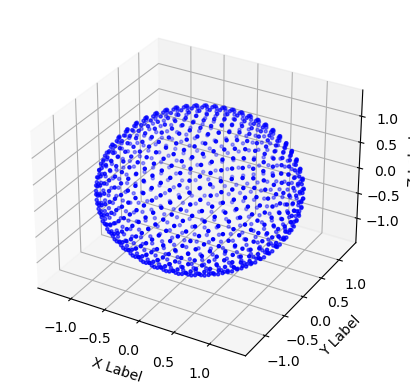

In [55]:
n_points = 1000
visualize(n_points)

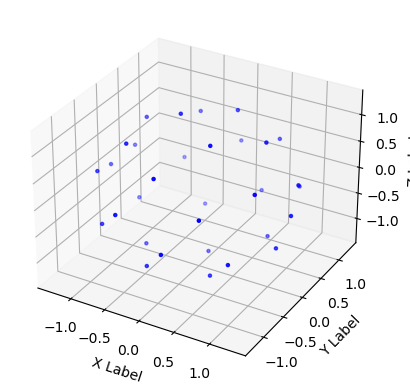

In [56]:
n_points = 32
visualize(n_points)

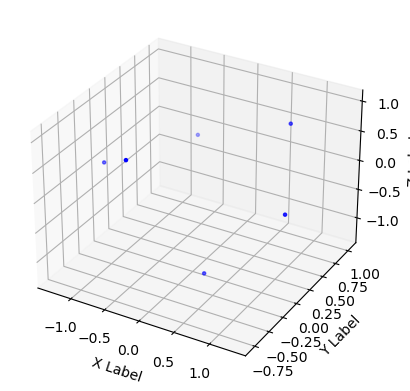

In [57]:
n_points = 6
visualize(n_points)